In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
np.random.seed(43)
from sklearn.cluster import KMeans

In [226]:
data = open("X_train.txt")
data = data.readlines()
label = pd.read_csv("y_train.txt", header=None)

In [227]:
test_data = open("X_test.txt")
test_data = test_data.readlines()
test_label = pd.read_csv("y_test.txt", header=None)

In [228]:
train_X=[]
for i in data:
  row = i.strip().split(" ")
  row = [float(j) for j in row if j!='']
  train_X.append(row)
train_X = np.array(train_X)

In [229]:
test_X=[]
for i in test_data:
  row = i.strip().split(" ")
  row = [float(j) for j in row if j!='']
  test_X.append(row)
test_X = np.array(test_X)

TSNE plot for data along with label


In [ ]:
tsne_2d = TSNE(n_components=2, verbose=2).fit_transform(train_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.638s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348515
[t-SNE] Computed conditional probabilities in 0.327s
[t-SNE] Iteration 50: error = 90.3682404, gradient norm = 0.0378039 (50 iterations in 3.983s)
[t-SNE] Iteration 100: error = 80.3216248, gradient norm = 0.0066177 (50 iterations in 3.414s)
[t-SNE] Iteration 150: error = 78.8100586, gradient norm = 0

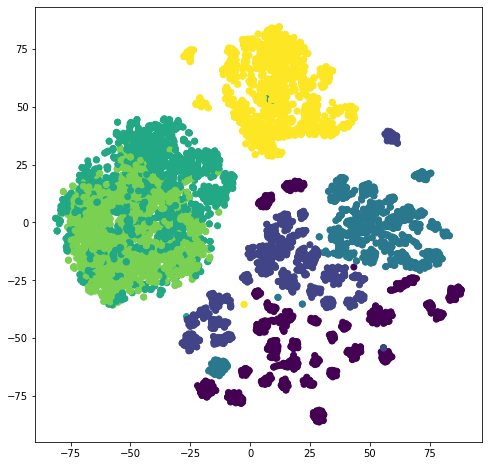

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c=label)
plt.show()

Grid Search for optimal K

In [230]:
ks = []
distortion = []
for k in range(5, 50, 5):
  ks.append(k)
  random_indices = np.random.choice(train_X.shape[0], size=k, replace=False)
  means = train_X[random_indices, :]
  while True:
    distances = cdist(train_X, means, 'euclidean')
    clusters = np.argmin(distances, axis=1)
    old_means = means
    for i in range(k):
      means[i] = np.mean(train_X[clusters == i], axis=0)
    if old_means.all() == means.all():
      distortion.append(np.sum(np.min(distances, axis=1)))
      break

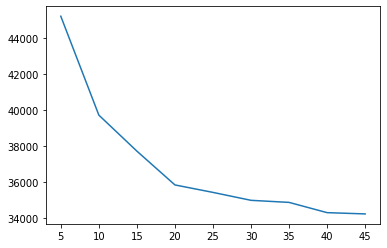

In [231]:
plt.plot(ks, distortion)
plt.show()

Optimal K=20 from elbow method

In [232]:
k=20
random_indices = np.random.choice(train_X.shape[0], size=k, replace=False)
means = train_X[random_indices, :]
while True:
  distances = cdist(train_X, means, 'euclidean')
  clusters = np.argmin(distances, axis=1)
  old_means = means
  for i in range(k):
    means[i] = np.mean(train_X[clusters == i], axis=0)
  if old_means.all() == means.all():
    break

TSNE plot along with cluster color

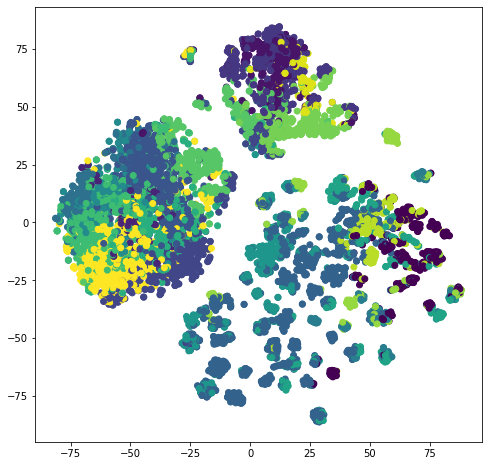

In [233]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c=clusters)
plt.show()

In [234]:
np.unique(clusters, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([ 403,  274,  100,  383,  400,  505, 1484,  177,  185,  189,  429,
         355,  240,  403,  448,  355,  219,  216,  111,  476]))

In [235]:
cluster_labels = []
for i in range(k):
  dist = np.unique(label[clusters==i], return_counts=True)
  cluster_labels.append(dist[0][np.argmax(dist[1])])
cluster_labels

[3, 6, 5, 6, 5, 4, 1, 4, 1, 5, 2, 3, 5, 5, 4, 6, 2, 3, 6, 5]

In [236]:
len(clusters)

7352

Train Accuracy

In [237]:
def accuracy(expected,predicted):
  correct_predictions = expected == predicted
  sum_of_correct_predictions = correct_predictions.sum()
  accuracy = sum_of_correct_predictions/expected.shape[0]
  return accuracy

In [238]:
train_predict_labels = np.array([cluster_labels[i] for i in clusters])
train_predict_labels

array([4, 4, 4, ..., 1, 2, 1])

In [239]:
label[0].to_numpy()

array([5, 5, 5, ..., 2, 2, 2])

In [240]:
accuracy(label[0].to_numpy(), train_predict_labels)

0.6458106637649619

Test Accuracy

In [241]:
test_distances = cdist(test_X, means, 'euclidean')
test_clusters = np.argmin(test_distances, axis=1)

In [242]:
test_predict_labels = np.array([cluster_labels[i] for i in test_clusters])
test_predict_labels

array([5, 5, 5, ..., 2, 2, 2])

In [243]:
accuracy(test_label[0].to_numpy(), test_predict_labels)

0.7007125890736342

Sklearn K-means

In [244]:
kmeans_model = KMeans(n_clusters=20, random_state=0)
kmeans_model.fit(train_X)

KMeans(n_clusters=20, random_state=0)

Sklearn Accuracy Training

In [245]:
train_predicted_clusters = kmeans_model.predict(train_X)


In [246]:
cluster_labels_sklearn = []
for i in range(k):
  dist = np.unique(label[train_predicted_clusters==i], return_counts=True)
  cluster_labels_sklearn.append(dist[0][np.argmax(dist[1])])
cluster_labels_sklearn

[1, 4, 2, 6, 5, 4, 3, 2, 3, 6, 3, 2, 6, 6, 5, 3, 2, 1, 1, 2]

In [247]:
train_predict_labels_sklearn = np.array([cluster_labels_sklearn[i] for i in train_predicted_clusters])
train_predict_labels

array([4, 4, 4, ..., 1, 2, 1])

In [248]:
accuracy(label[0].to_numpy(), train_predict_labels_sklearn)

0.7561207834602829

Sklearn Test Accuracy

In [249]:
test_predicted_clusters = kmeans_model.predict(test_X)
test_predicted_clusters

array([ 4, 14,  1, ..., 11, 11, 11], dtype=int32)

In [250]:
test_predict_labels_sklearn = np.array([cluster_labels_sklearn[i] for i in test_predicted_clusters])
test_predict_labels

array([5, 5, 5, ..., 2, 2, 2])

In [251]:
accuracy(test_label[0].to_numpy(), test_predict_labels_sklearn)

0.7787580590430947